In [50]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [1]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.keys())
print(type(iris))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
<class 'sklearn.utils._bunch.Bunch'>


In [8]:
print(iris.feature_names)
X=pd.DataFrame(iris.data,columns=iris.feature_names)
print(X.head())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
print(X.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [14]:
print(X.shape)

(150, 4)


In [18]:
Y=pd.DataFrame(iris.target,columns=['target'])
print(iris.target_names)
Y.head()

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,target
0,0
1,0
2,0
3,0
4,0


In [47]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.37,random_state=42)
print(Xtrain.shape, Xtest.shape, type(Xtrain))
print(Ytrain.shape, Ytest.shape, type(Ytrain))

(94, 4) (56, 4) <class 'pandas.core.frame.DataFrame'>
(94, 1) (56, 1) <class 'pandas.core.frame.DataFrame'>


In [26]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.reset_index(drop=True,inplace=True)

In [104]:
tree_clf=dtc(max_depth=4, min_samples_split=5, random_state=42)
tree_clf=tree_clf.fit(Xtrain,Ytrain)
train_score=tree_clf.score(Xtrain,Ytrain)
test_score=tree_clf.score(Xtest,Ytest)
print(train_score,test_score)

0.9680851063829787 0.9821428571428571


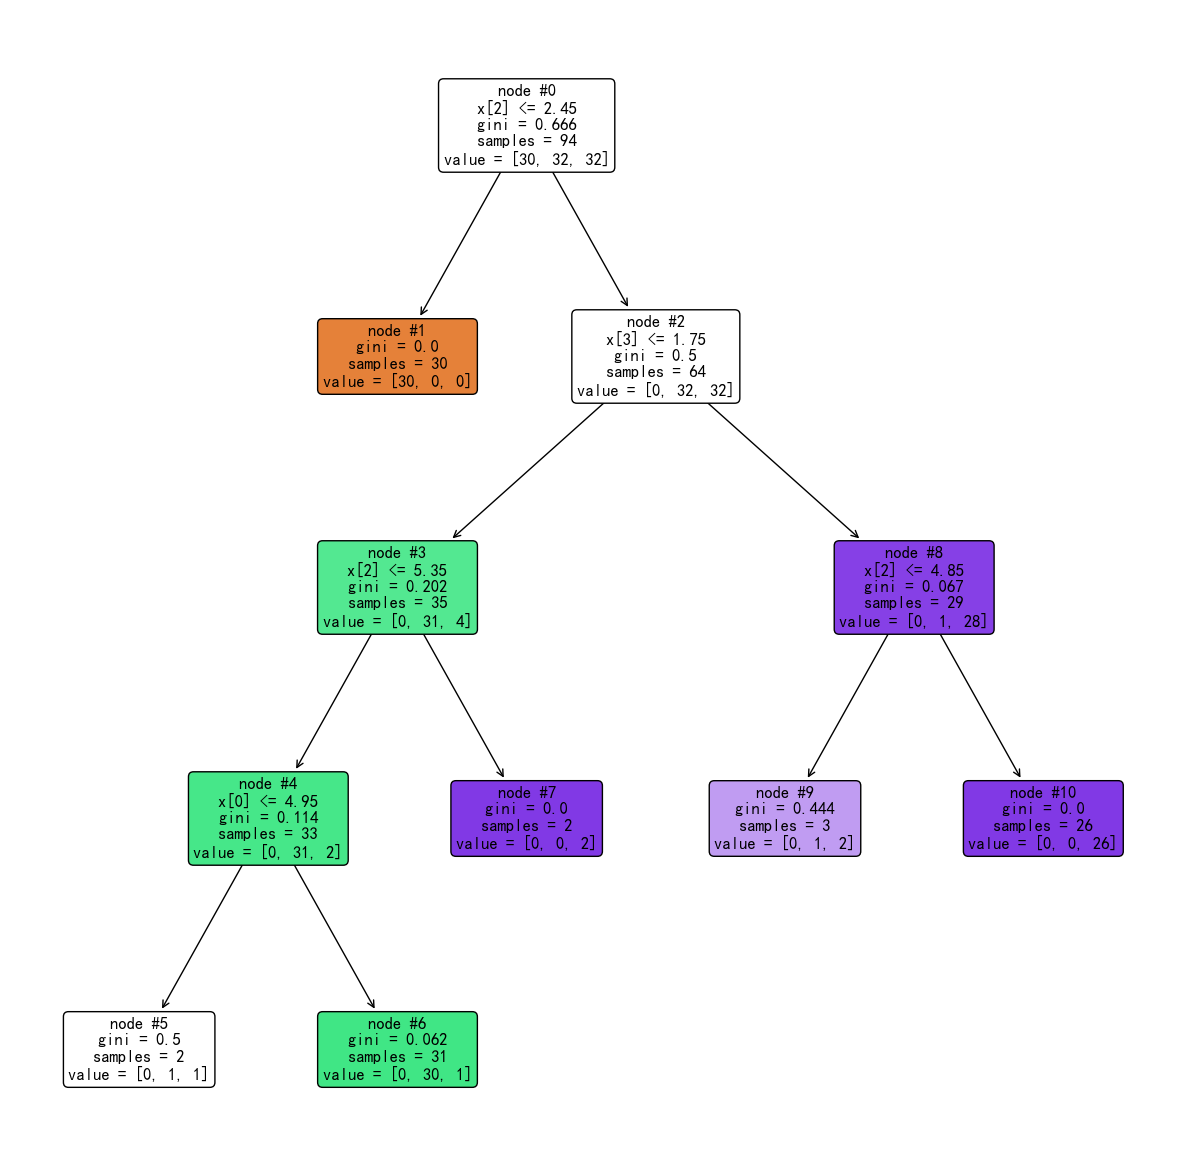

In [105]:
# 对决策树进行美化并保存决策树图片到本地

plt.figure(figsize=(15,15))      #设置画布大小（单位为英寸）
sklearn.tree.plot_tree(tree_clf             #训练好的决策树评估器
               ,node_ids=True  #显示节点id
               ,filled=True    #给节点填充颜色
               ,rounded=True   #节点方框变成圆角
               ,fontsize=12    #节点中文本的字体大小
              )

plt.savefig("决策树.png")      #保存图片一定要在plt.show()之前
plt.show()

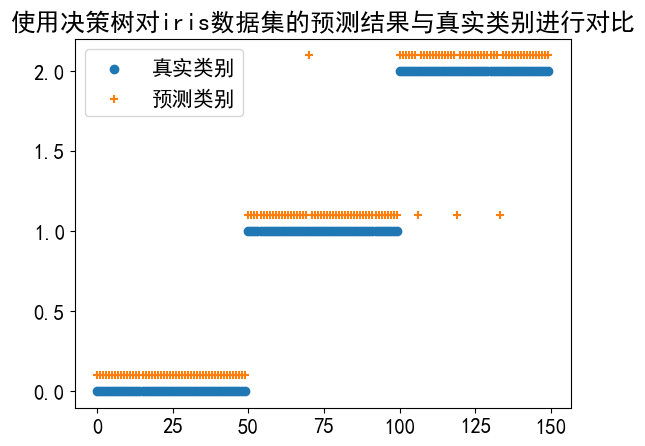

In [57]:
y_predict=tree_clf.predict(X)

# 可视化部分
plt.rcParams['font.sans-serif']='SimHei' # 设置字体为SimHei以显示中文
plt.rcParams['axes.unicode_minus']=False # 坐标轴刻度不显示负号
plt.rc('font',size=(15))
plt.scatter(range(len(Y)),Y,marker='o')
plt.scatter(range(len(Y)),y_predict+0.1,marker='+')
plt.legend(['真实类别','预测类别'])
plt.title('使用决策树对iris数据集的预测结果与真实类别进行对比')
plt.show() 

In [54]:
dtc?

Init signature:
dtc(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None

1.0


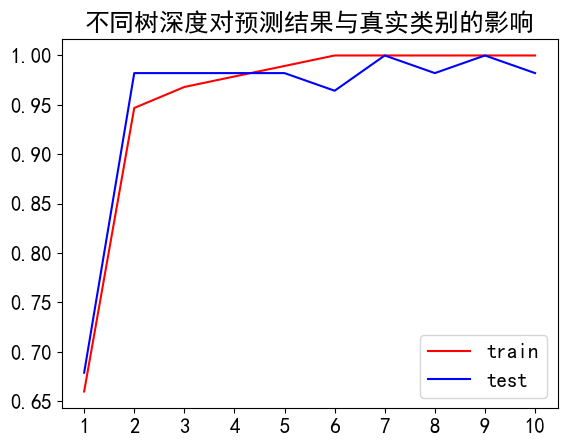

In [95]:
tr,te = [],[]
for i in range(1,11):
    clf=dtc(max_depth=i)
    clf=clf.fit(Xtrain,Ytrain)
    score_tr=clf.score(Xtrain,Ytrain)
    score_te=clf.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.title('不同树深度对预测结果与真实类别的影响')
plt.show()

1.0


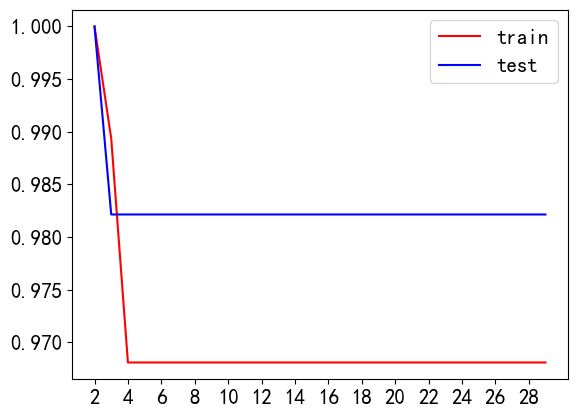

In [97]:
tr,te = [],[]
for i in range(2,30):
    clf = dtc(min_samples_split=i)
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = clf.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(2,30),tr,color="red",label="train")
plt.plot(range(2,30),te,color="blue",label="test")
plt.xticks(range(2,30)[::2])
plt.legend()
plt.show()

1.0


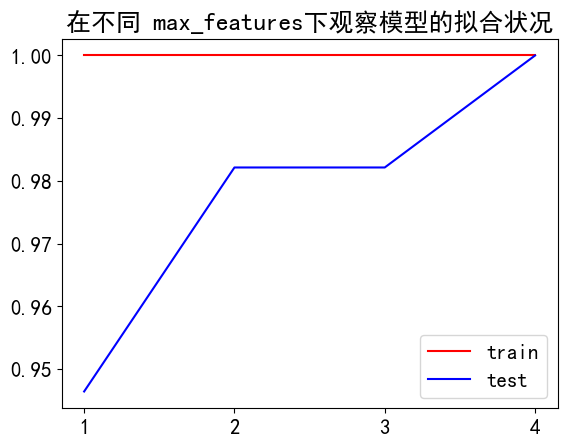

In [103]:
tr,te = [],[]
for i in range(1,5):
    clf = dtc(max_features=i)
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = clf.score(Xtest,Ytest)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,5),tr,color="red",label="train")
plt.plot(range(1,5),te,color="blue",label="test")
plt.xticks(range(1,5))
plt.legend()
plt.title('在不同 max_features下观察模型的拟合状况')
plt.show()